# Lab 8: Define and Solve an ML Problem of Your Choosing

In [13]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [14]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

#chose airbnb dataset
df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Data set: Airbnb NYC Listings
2. Prediction: Predicting review_scores_value (reflects how guests rate the experience of the particular airbnb listing)
3. Supervised learning problem  (Regression type)
4. Features: host response rate, acceptance rate, review scores accuracy, location and checkin
5. Helps predict the value rating (review_scores_value) of an airbnb listing based on a particular neighborhood, location, perception and satisfaction. The model can help improve customer experience and also provide details to aspiring hosts about the ratings across a region.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.


 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           280

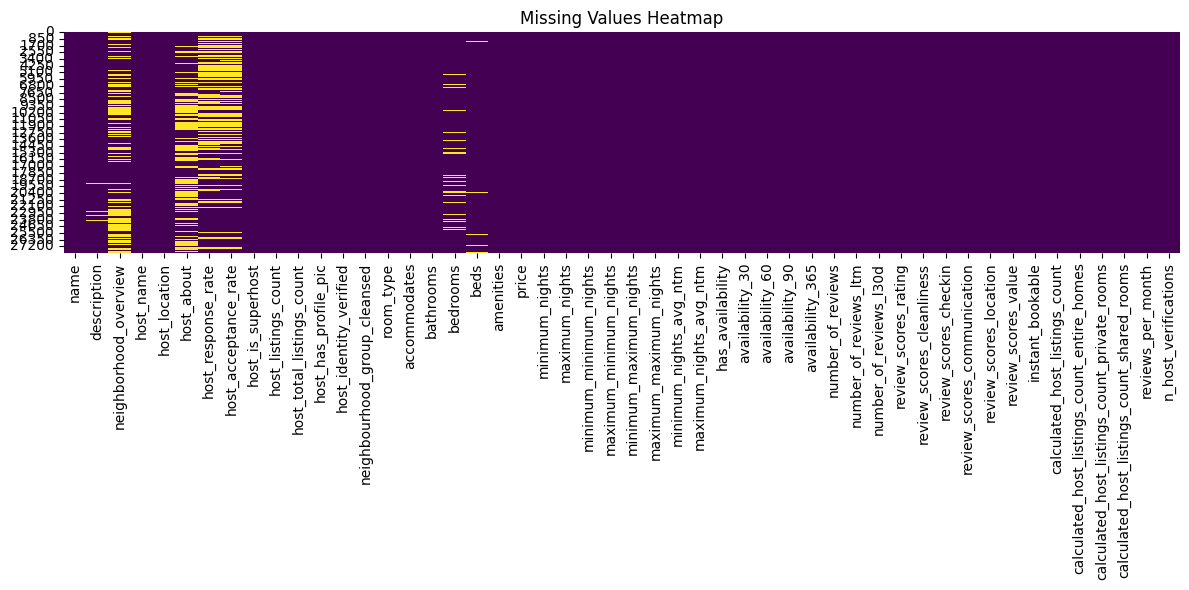

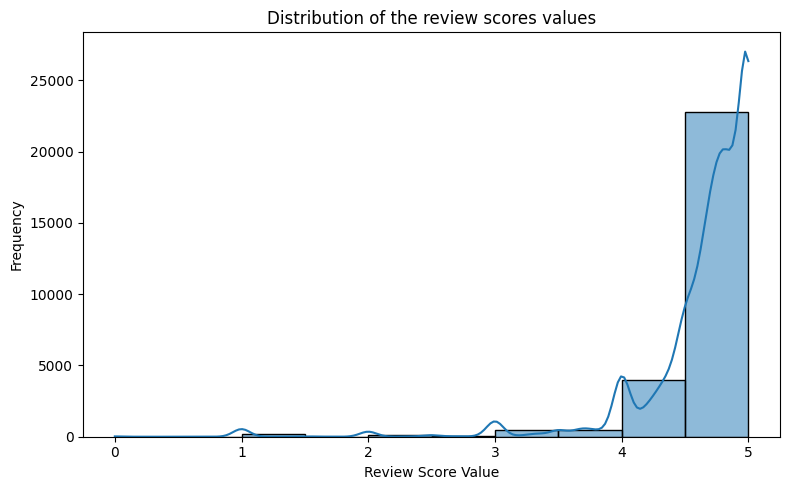

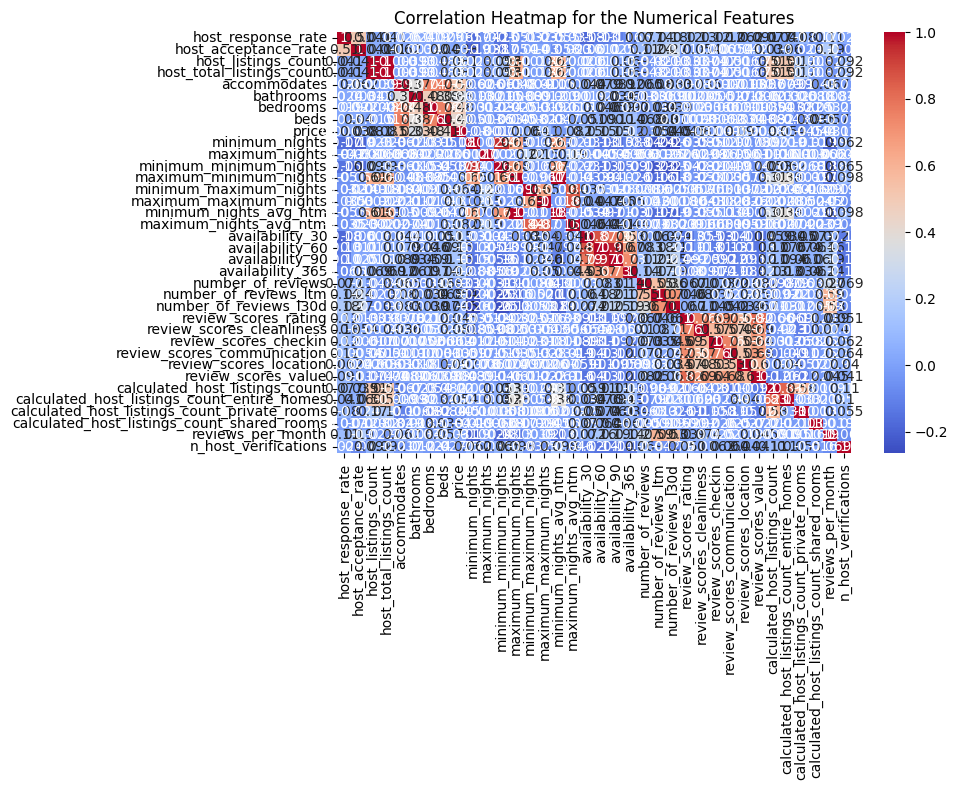

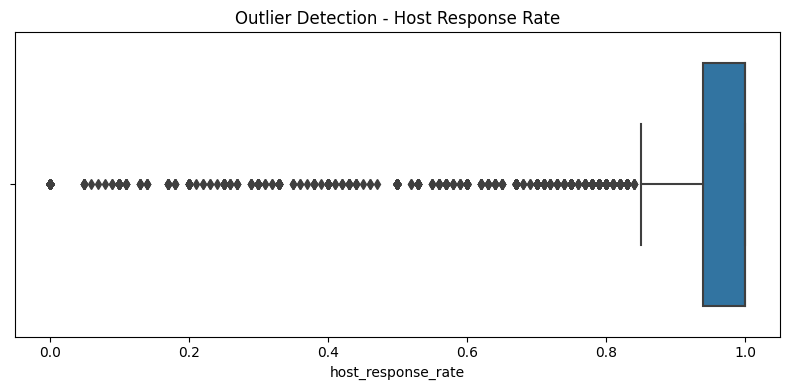

In [15]:
print("\n Data Info")
print(df.info())

print("\n Missing Values")
print(df.isnull().sum().sort_values(ascending=False))

print("\n Stats Summary")
print(df.describe())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['review_scores_value'].dropna(), bins=10, kde=True)
plt.title("Distribution of the review scores values")
plt.xlabel("Review Score Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for the Numerical Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['host_response_rate'].dropna())
plt.title("Outlier Detection - Host Response Rate")
plt.tight_layout()
plt.show()





## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Following the dataset's analysis, I honed my feature list to select variables with few missing data and those pertinent to forecasting the review score value.  I decided to retain the following features: host_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, host_is_superhost, host_response_rate, host_acceptance_rate, and review_scores_location.  These characteristics have a direct bearing on the guest experience and are likely to affect how much a guest thinks a listing is worth.  Name, description, and host_about are examples of text-heavy or high-cardinality attributes that I eliminated because they aren't directly helpful for this regression problem without further NLP processing.
I intend to use the median to impute missing values in numerical features and remove rows with missing values from the target column in order to get the data ready for modeling.  Host_is_superhost and other boolean characteristics will be changed to 0 and 1.  Since the scale of the chosen features varies, I will also use standardization to apply feature scaling.  I'll check for outliers in features like host_response_rate and take appropriate action.
The Random Forest Regressor and Linear Regression are the two regression models I intend to employ for modeling.  While Random Forest is anticipated to better capture intricate, nonlinear associations, Linear Regression will aid in comprehending the influence of specific characteristics.  I'll use an 80/20 ratio to divide the data into training and test sets.  Both models will be trained, and their RMSE and R2 scores will be used for evaluation.  I will experiment with the Random Forest model's hyperparameter tuning to enhance performance, and if necessary, I will also take feature selection into account.  My objective is to create a model that yields useful insights and works well on fresh data.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [16]:
# Import required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Linear Regression Results
RMSE: 0.28479459722906353
R² Score: 0.7140098559179908


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



 Random Forest Results
RMSE: 0.3036993965707252
R² Score: 0.6747813578177919


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



 Tuned Random Forest Results
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}
RMSE: 0.29282264442741673
R² Score: 0.6976591073732895


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


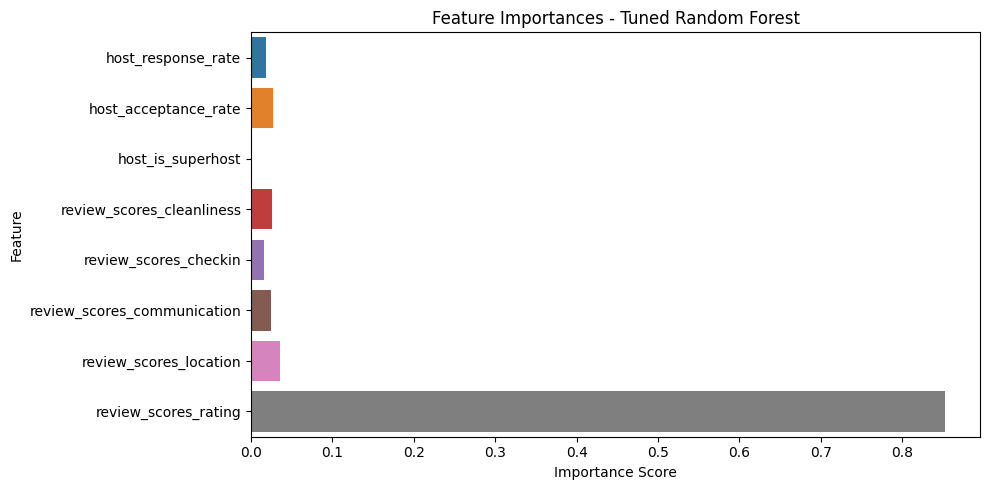

In [17]:
df = pd.read_csv(airbnbDataSet_filename)

features = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_rating'
]

label = 'review_scores_value'

df_model = df[features + [label]].dropna()

df_model['host_is_superhost'] = df_model['host_is_superhost'].astype(int)

X = df_model[features]
y = df_model[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression Results")
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R² Score:", r2_score(y_test, y_pred_lr))

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Results")
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R² Score:", r2_score(y_test, y_pred_rf))

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\n Tuned Random Forest Results")
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))
print("R² Score:", r2_score(y_test, y_pred_best))

importances = best_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
With an RMSE of 0.2848 and an R2 score of 0.7140, I discovered that the linear regression model outperformed the other models after training and assessing several regression models.  
Remarkably, it performed marginally better than the Random Forest model, which received scores of 0.6748 R2 and 0.3037 RMSE.  
The performance improved even after using GridSearchCV to fine-tune the Random Forest model, but it was still not better than linear regression.  
Review_scores_rating dominated the feature space and was the most significant predictor of review_scores_value, according to the feature significance analysis.  
To a far lesser degree, other aspects of the evaluation, like location, communication, and cleanliness, also had a role.  
These findings suggest that simpler models can generalize well on this dataset and that guests' perceptions of overall rating and perceived value closely correspond.